# CREDIT CARD RISK MANAGMENT 

## OVERVIEW :

###  1.Dataset has been downloaded from kaggle .
###  2.The Dataset includes many features and a target variable.


## AIM:

###  Prediction of fraud credit cards by classification (1 or 0) 


# METHODS USED : 
## 1. RANDOM FOREST WITH TUNING 
## 2. RIDGE CLASSIFIER WITH TUNING
## 3. ANN WITH TUNING

##  I Have used ridge classifier with the help of pycaret library(for better accuracy)

## CREDIT CARD FRAUDS CAN BE IDENTIFIED  BY USING ML MODELS , SO THIS IS ONE OF THE EXAMPLE .

# IMPORTING THE DATA

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv(r'C:\Users\neeraj\OneDrive\Desktop\Credit_default_dataset.csv')

# SPLITTING THE DATA 

In [5]:
X=data.iloc[:,:-1].values
y=data['default.payment.next.month'].values


In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# DATA PREPROCESSING

In [7]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [8]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [9]:
data['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [10]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

## VISUALISATION :

In [21]:

data2=data.drop(['PAY_0' ,'PAY_3', 'PAY_4', 'PAY_5','PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3' ,  'BILL_AMT4', 'BILL_AMT5' , 'BILL_AMT6' ,  'PAY_AMT1' ,'PAY_AMT2' , 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5'  ,'PAY_AMT6'],axis=1)

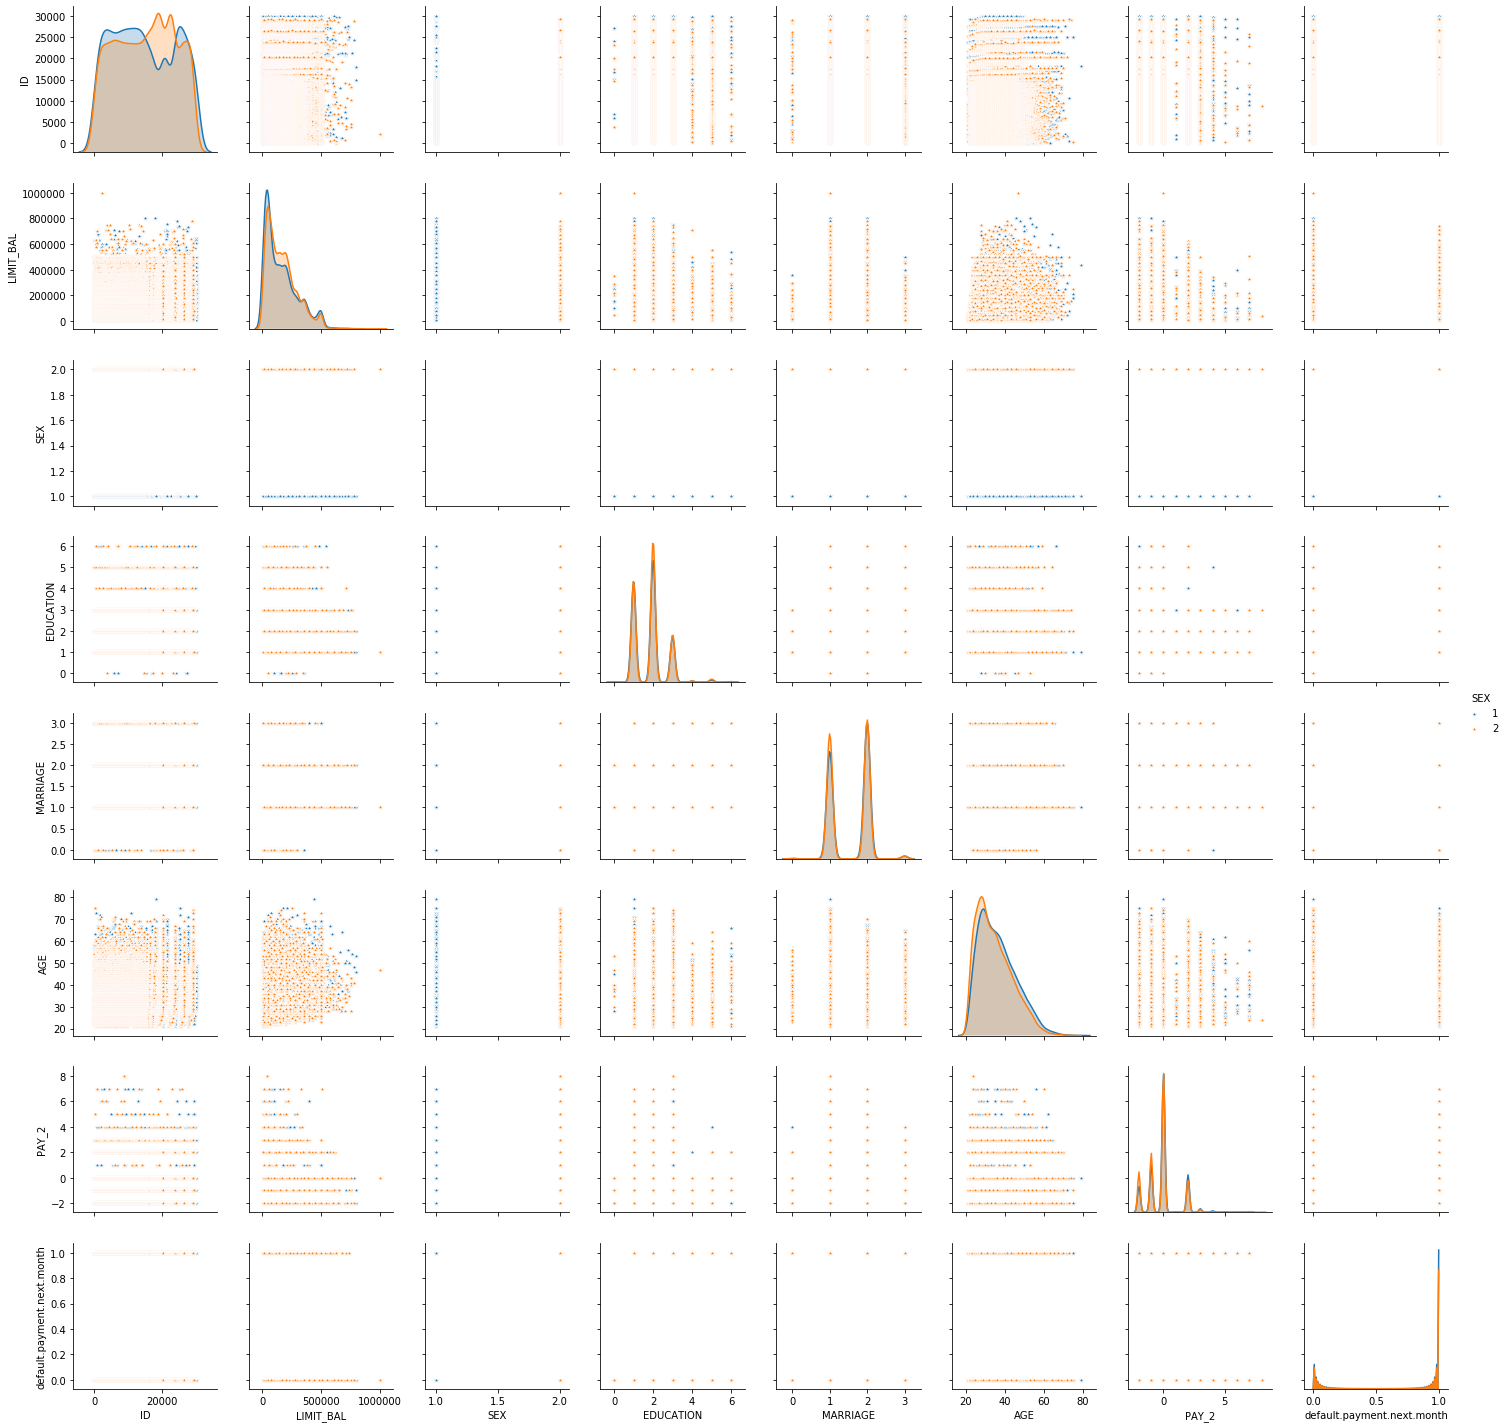

In [22]:
sns.pairplot(data2,diag_kind='kde',markers='*',hue="SEX")

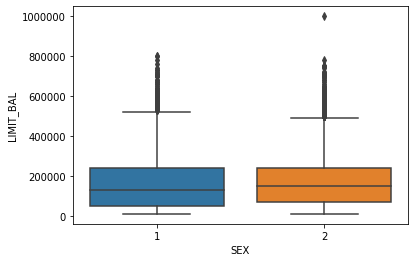

In [14]:
sns.boxplot(x="SEX", y="LIMIT_BAL", data=data);

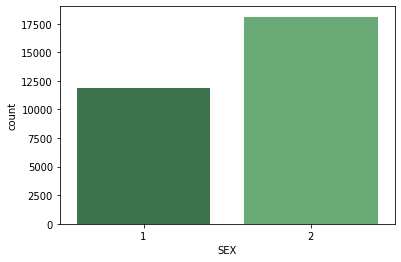

In [15]:
sns.countplot(x="SEX", data=data, palette="Greens_d")

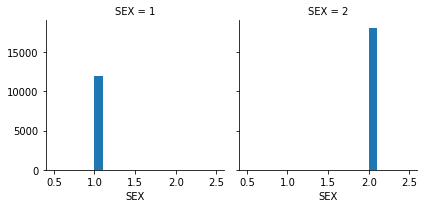

In [18]:
g = sns.FacetGrid(data,col='SEX')
g.map(plt.hist,"SEX")

# FEATURE SELECTION 

In [26]:
data.shape

(30000, 25)

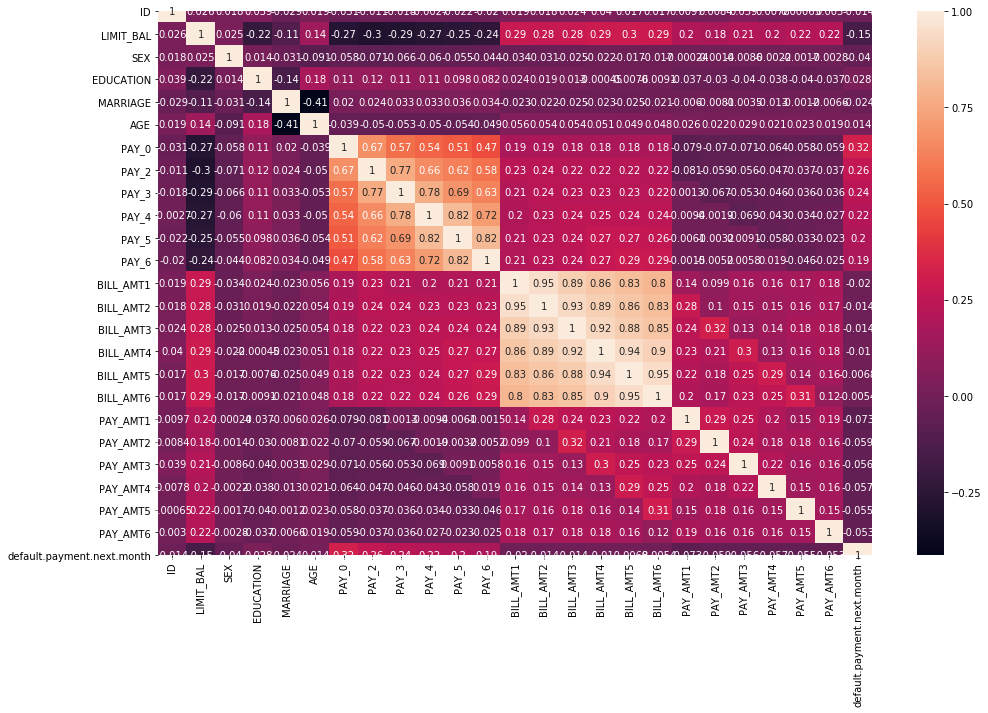

In [27]:
data.corr() ##will give coreation bw all features.
 
##HEATMAP 
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot=True)
plt.show()


In [28]:
data.drop(['BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5'],axis=1,inplace=True)

In [29]:
data.shape

(30000, 21)

# USING THE  STEP BACKWARD METHOD FOR FEATURE SELECTION 

In [38]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [39]:
from sklearn.ensemble import RandomForestClassifier
import mlxtend as ml

In [40]:

from mlxtend.feature_selection import  SequentialFeatureSelector as SFS

sfs=SFS(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1),k_features=10,forward=True,floating=False,verbose=2,scoring='accuracy',cv=4).fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.0min finished

[2020-05-31 21:05:42] Features: 1/10 -- score: 0.8169333333333333[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   59.6s finished

[2020-05-31 21:06:42] Features: 2/10 -- score: 0.8185777777777778[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   56.7s finished

[2020-05-31 21:07:39] Features: 3/10 -- score: 0.8188[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   

In [41]:
sfs.k_feature_names_

('LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6')

# HERE THE SCORE IS 79% ,LETS COMPARE IT WITH RANDOM FOREST 

# USING RANDOM FOREST 

In [49]:

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)



In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[5555  313]
 [1107  525]]


In [45]:
(5555+525)/(5555+1107+525+313)

0.8106666666666666

# APLLYING GRID SEARCH FOR BETTER PARAMETERS

In [46]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [1, 10, 100, 1000], 'criterion': ['gini','entropy']}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [48]:
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 81.77 %
Best Parameters: {'criterion': 'entropy', 'n_estimators': 1000}


# SO, WE HAVE ACCURACY AS 82% WITH TUNING

# LETS GIVE A TRY TO SVM ..

In [50]:
# Training the Kernel SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[5868    0]
 [1632    0]]


In [51]:
5868/(5868+1632)

0.7824

# SO, WE HAVE 78% WITH SVM .

# RANDOM FOREST GAVE US A BETTER ACCURACY OF 82%

# USING PYCARET FOR AUTOMATED ACCURACY 

# USE THE LINK FOR CODE : https://drive.google.com/drive/u/2/my-drive

## PYCARET SUGGESTED TO USE RIDGE CLASSIFIER  WITH 82.0% ACCURACY

In [2]:
## PARAMETRS USED : RidgeClassifier(alpha=0.154, class_weight=None, copy_X=True, fit_intercept=True,max_iter=None, normalize=False, random_state=5213,solver='auto', tol=0.001)

# SO FINALLY OUR BEST ACCURACY IS 82%.

# LETS TRY WITH ANN :

In [32]:
A=data.iloc[:,:-1].values
b=data['default.payment.next.month'].values
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(A, b, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
A = sc.fit_transform(A)
print(A)

[[-1.73199307 -1.13672015  0.81016074 ... -0.30806256 -0.31413612
  -0.29338206]
 [-1.7318776  -0.3659805   0.81016074 ... -0.24422965 -0.31413612
  -0.18087821]
 [-1.73176213 -0.59720239  0.81016074 ... -0.24422965 -0.24868274
  -0.01212243]
 ...
 [ 1.73176213 -1.05964618 -1.23432296 ... -0.03996431 -0.18322937
  -0.11900109]
 [ 1.7318776  -0.67427636 -1.23432296 ... -0.18512036  3.15253642
  -0.19190359]
 [ 1.73199307 -0.90549825 -1.23432296 ... -0.24422965 -0.24868274
  -0.23713013]]


In [34]:

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="he_uniform")`
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="he_uniform")`
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 15074 samples, validate on 7426 samples
Epoch 1/100
15074/15074 [==============================] - 5s 344us/step - loss: 1232.7777 - accuracy: 0.6579 - val_loss: 260.4480 - val_accuracy: 0.7000
Epoch 2/100
15074/15074 [==============================] - 4s 295us/step - loss: 209.7149 - accuracy: 0.6854 - val_loss: 107.8455 - val_accuracy: 0.6962
Epoch 3/100
15074/15074 [==============================] - 4s 297us/step - loss: 96.5669 - accuracy: 0.6777 - val_loss: 60.4995 - val_accuracy: 0.4257
Epoch 4/100
15074/15074 [==============================] - 4s 292us/step - loss: 44.0118 - accuracy: 0.6753 - val_loss: 12.6749 - val_accuracy: 0.7129
Epoch 5/100
15074/15074 [==============================] - 4s 295us/step - loss: 30.5494 - accuracy: 0.6800 - val_loss: 36.2798 - val_accuracy: 0.7713
Epoch 6/100
15074/15074 [==============================] - 4s 297us/step - loss: 27.3039 - accuracy: 0.6794 - val_loss: 36.4320 - val_accuracy: 0.7716
Epoch 7/100
15074/15074 [===============

In [36]:


# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)


In [37]:
score

0.7822666666666667

# SO WE HAVE ACCURACY ABOUT  78%

# APPLYING HYPER PARAMETER TUNING FOR BETTER ACCURACY :

In [38]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid



def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)


layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)

grid_result = grid.fit(X_train, y_train)

[grid_result.best_score_,grid_result.best_params_]








[0.7776000142097473,
 {'activation': 'sigmoid', 'batch_size': 128, 'epochs': 30, 'layers': [20]}]

In [39]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)


In [40]:
score

0.7822666666666667

# SO WE STILL HAVE 78% ACCURACY .

# FINALLY I WOULD LIKE TO TAKE THE MODEL WITH 82% ACCURACY .
